In [1]:
from us import states
from pathlib import Path
from census import Census
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src/')

In [2]:
from utils import plotly_us_census

In [3]:
import census

* 2009 https://api.census.gov/data/2009/acs5?
* 2011 https://api.census.gov/data/2011/acs/acs5?
* 2012 http://api.census.gov/data/2012/acs/acs5?
* 2015 https://api.census.gov/data/2015/acs/acs5?get=NAME,B01001_001E&for=state:*
* 2016 https://api.census.gov/data/2016/acs/acs5?get=NAME,group(B01001)&for=us:1
* 2017 https://api.census.gov/data/2017/acs/acs5?get=NAME,group(B01001)&for=us:1
* 

B25013_006E: owner occupied >= undergrad

B25013_001E: owner occupied total

In [4]:
sys.path.append('../.keys')

In [5]:
apikey = json.load(open(Path('../.keys')/'census_keys.json','r'))['APIKEY']

In [8]:
c = Census(apikey)

In [34]:
upshot = pd.read_csv('../data/CountyData.tsv', sep='\t')

In [35]:
upshot['id'] = upshot['id'].apply(lambda x: str(x).zfill(5)) 

In [36]:
upshot.set_index('id',inplace=True)

In [147]:
lab_dict = upshot['County'].to_dict()

In [11]:
#c.acs5.state('B24041_006E', '*',year=2015)

In [ ]:
data1 = c.acs5.get('B25013_006E', geo={'for': 'county:*', 'in': 'state:*'},year =2016)

In [11]:
pd.DataFrame(data1).shape

(3220, 3)

In [24]:
data2 = c.acs5.get('B25013_001E', geo={'for': 'county:*', 'in': 'state:*'}, year=2009)
d2 = pd.DataFrame(data2)

In [22]:
np.arange(2009,2018)

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [9]:
year2df_pop_all = {}
for year in np.arange(2009,2018):
    print(year)
    
    df = pd.DataFrame(c.acs5.get('B01001_001E', geo={'for': 'county:*', 'in': 'state:*'}, year=year))
    df['fips'] = df['state'].astype(str) + df['county'].astype(str) 
    year2df_pop_all.update({year:df})

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [10]:
clean_year2df_pop_all = {}
for key,val in year2df_pop_all.items():
    val2 = val.copy(deep=True)
    val2 = val2.rename(columns = {'B01001_001E':str(key)})
    val2.drop(['state','county'],inplace=True,axis=1)
    val2.set_index('fips',inplace=True)
    clean_year2df_pop_all.update({key:val2})

In [11]:
year2df = {}
for year in np.arange(2009,2018):
    print(year)
    
    df = pd.DataFrame(c.acs5.get('B25013_006E', geo={'for': 'county:*', 'in': 'state:*'}, year=year))
    df['fips'] = df['state'].astype(str) + df['county'].astype(str) 
    year2df.update({year:df})

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [12]:
clean_year2df = {}
for key,val in year2df.items():
    val2 = val.copy(deep=True)
    val2 = val2.rename(columns = {'B25013_006E':str(key)})
    val2.drop(['state','county'],inplace=True,axis=1)
    val2.set_index('fips',inplace=True)
    clean_year2df.update({key:val2})

In [13]:
year2df_pop = {}
for year in np.arange(2009,2018):
    print(year)
    
    df = pd.DataFrame(c.acs5.get('B25013_001E', geo={'for': 'county:*', 'in': 'state:*'}, year=year))
    df['fips'] = df['state'].astype(str) + df['county'].astype(str) 
    year2df_pop.update({year:df})

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [14]:
clean_year2df_pop = {}
for key,val in year2df_pop.items():
    val2 = val.copy(deep=True)
    val2 = val2.rename(columns = {'B25013_001E':str(key)})
    val2.drop(['state','county'],inplace=True,axis=1)
    val2.set_index('fips',inplace=True)
    clean_year2df_pop.update({key:val2})

In [15]:
all_years = pd.concat(list(clean_year2df.values()), axis=1)

In [16]:
all_years.dtypes

2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object

In [17]:
all_years_pop = pd.concat(list(clean_year2df_pop.values()), axis=1)

In [18]:
all_years_pop_all = pd.concat(list(clean_year2df_pop_all.values()), axis=1)

In [19]:
all_years_pop_all =  all_years_pop_all.dropna().astype(float)

In [20]:
all_years_pop = all_years_pop.dropna().astype(float)

In [216]:
all_years.to_csv('../data/B25013_001E.csv')

In [218]:
all_years_pop.to_csv('../data/population_census_B01001_001E.csv')

In [165]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [21]:
all_years_pop.dropna(inplace=True)

In [22]:
all_years.dropna(inplace=True)

In [23]:
all_years/all_years_pop_all

2009      2010      2011      2012      2013      2014      2015  \
02013  0.010477  0.006211  0.009728  0.012203  0.008596  0.010619  0.012712   
02016  0.005813  0.004314  0.012391  0.007990  0.009209  0.010088  0.008797   
02020  0.093310  0.095020  0.094137  0.093673  0.091313  0.090245  0.093050   
02050  0.018891  0.021083  0.023037  0.021415  0.018668  0.016955  0.019464   
02060  0.036657  0.037178  0.045411  0.036598  0.031083  0.029146  0.027835   
...         ...       ...       ...       ...       ...       ...       ...   
56037  0.052862  0.054346  0.053207  0.052472  0.056192  0.056957  0.060172   
56039  0.123088  0.125998  0.133485  0.128013  0.120324  0.133859  0.144548   
56041  0.055271  0.052539  0.055032  0.053768  0.055038  0.054648  0.057907   
56043  0.085098  0.071213  0.069517  0.068843  0.075579  0.070820  0.077381   
56045  0.067701  0.063827  0.059910  0.056068  0.049630  0.053118  0.062500   

           2016      2017  
02013  0.013640  0.011983  
02016  0.007175  0.008817  
02020  0.097390  0.098905  
02050  0.019290  0.020605  
02060  0.024416  0.020720  
...         ...       ...  
56037  0.063398  0.066454  
56039  0.146576  0.147886  
56041  0.047767  0.052317  
56043  0.079392  0.076699  
56045  0.063275  0.063229  

[3218 rows x 9 columns]

In [24]:
all_years.dtypes

2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object

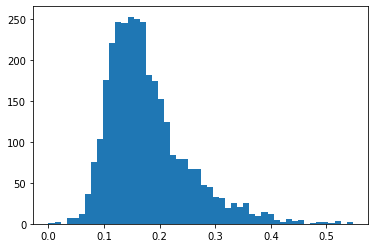

In [25]:
plt.hist((all_years/all_years_pop)['2017'], bins='auto');

/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:403: RuntimeWarning:

invalid value encountered in greater_equal

/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:404: RuntimeWarning:

invalid value encountered in less_equal

/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



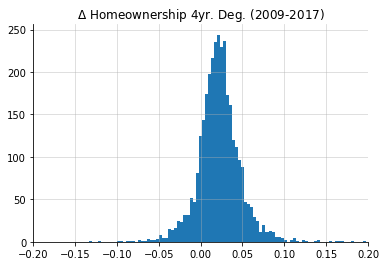

In [155]:
plt.grid(alpha=.5,zorder=1)
plt.hist((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009'], bins='auto',zorder=0);
plt.title('$\Delta$ Homeownership 4yr. Deg. (2009-2017)')
plt.xlim(-.2,.2)
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('delta_education.pdf')
plt.savefig('delta_education.png')

In [48]:
ourmax = ((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009']).max()
ourmin = ((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009']).min()
percentchange = ((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009'])

In [49]:
percentchange[percentchange==ourmax] # sumter county fl pop 125k

12119    0.197329
dtype: float64

In [50]:
percentchange[percentchange==ourmin] # loving county TX, second least populous county

48301   -0.463415
dtype: float64

In [162]:
percentchange[percentchange>.1] 

02013    0.123286
02016    0.108310
08007    0.218990
08091    0.100582
08105    0.103898
12029    0.122768
30007    0.100427
32019    0.100902
46075    0.101024
72037    0.106984
72054    0.106520
dtype: float64

In [53]:
percentchange[percentchange<-.1].sort_values() # second least is Toole County MT, 5k residents

48301   -0.463415
30101   -0.129608
48269   -0.119971
dtype: float64

In [198]:
all_years_pop.loc['36041']

2009    5011.0
2010    4908.0
2011    4870.0
2012    4835.0
2013    4813.0
2014    4783.0
2015    4760.0
2016    4697.0
2017    4646.0
Name: 36041, dtype: float64

In [157]:
all_years.loc['08007']

2009    2714.0
2010    3377.0
2011    3951.0
2012    4536.0
2013    4881.0
2014    5343.0
2015    5334.0
2016    5382.0
2017    5553.0
Name: 08007, dtype: float64

In [158]:
all_years_pop.loc['08007']

2009    12225.0
2010    12136.0
2011    12152.0
2012    12109.0
2013    12109.0
2014    12132.0
2015    12174.0
2016    12355.0
2017    12592.0
Name: 08007, dtype: float64

In [89]:
percentchange.sort_values(inplace=True)

In [113]:
our_vals = percentchange.tail(11).index.tolist()[:-5] + percentchange.head(10).index.tolist()[4:]

In [114]:
our_vals

['31115',
 '06003',
 '13085',
 '16081',
 '48033',
 '12119',
 '31007',
 '37095',
 '48319',
 '21187',
 '08103',
 '35011']

In [101]:
all_years.loc[val]

2009     NaN
2010     NaN
2011     NaN
2012     NaN
2013     NaN
2014     NaN
2015    63.0
2016    42.0
2017    34.0
Name: 02158, dtype: float64

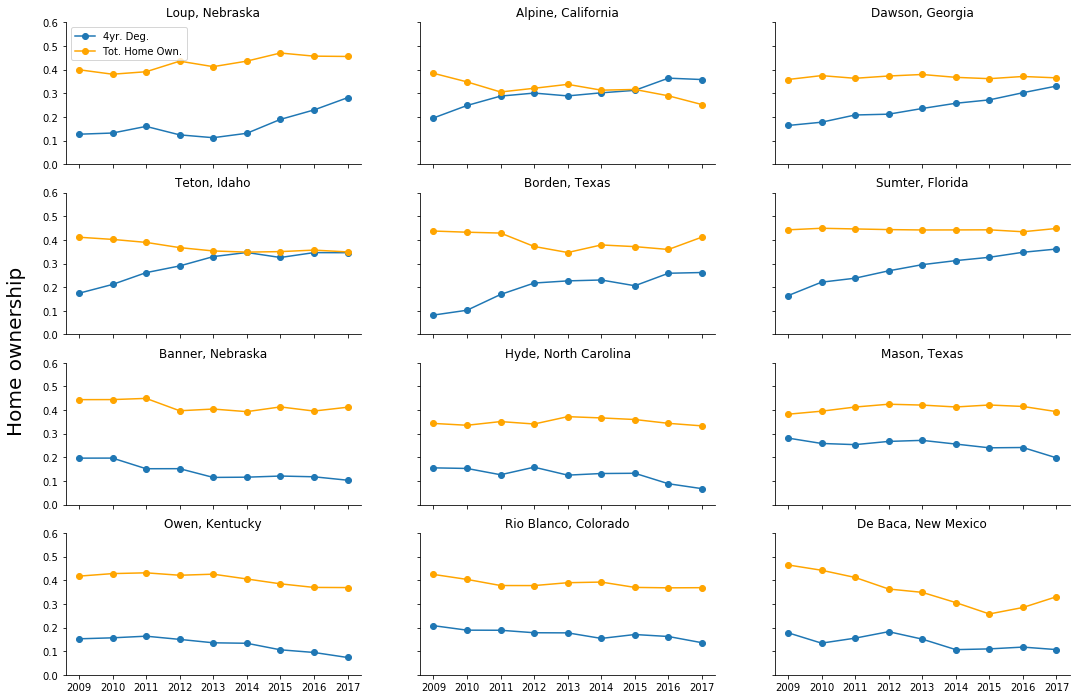

In [149]:
f,a = plt.subplots(4,3,figsize=(18,12),sharex=True, sharey=True)

a = a.ravel()

for i, val in enumerate(our_vals):
    a[i].plot((all_years.loc[val]/all_years_pop.loc[val]), marker='o',label='4yr. Deg.')
    #a[i].set_ylabel('% Home owners')
    #a[i].set_xticks(rotation=70)
    a[i].set_title(lab_dict[val])
    a[i].plot((all_years_pop.loc[val]/all_years_pop_all.loc[val]), marker='o', color='orange',label='Tot. Home Own.')
    a[i].set_ylim(0,.6)
    if i == 0:
        a[i].legend()
    #a[i]= plt.gca()
    a[i].spines['right'].set_visible(False)
    a[i].spines['top'].set_visible(False)
#f.tight_layout()
f.text(.08,.5,'Home ownership',va='center', rotation='vertical',fontsize=20)

plt.savefig('Ownership_edu_trends.pdf')
plt.savefig('Ownership_edu_trends.png',dpi=300)

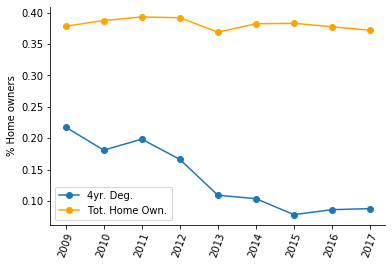

In [77]:
plt.plot((all_years.loc['30101']/all_years_pop.loc['30101']), marker='o',label='4yr. Deg.')
plt.ylabel('% Home owners')
plt.xticks(rotation=70)
#a2 = plt.twinx()
plt.plot((all_years_pop.loc['30101']/all_years_pop_all.loc['30101']), marker='o', color='orange',label='Tot. Home Own.')
#a2.set_ylabel('Population growth')
plt.legend()
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

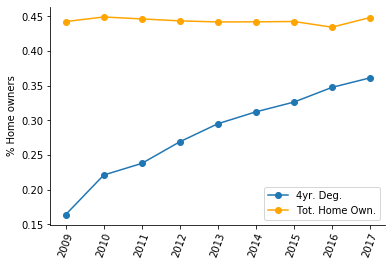

In [78]:
plt.plot((all_years.loc['12119']/all_years_pop.loc['12119']), marker='o',label='4yr. Deg.')
plt.ylabel('% Home owners')
plt.xticks(rotation=70)
#a2 = plt.twinx()
plt.plot((all_years_pop.loc['12119']/all_years_pop_all.loc['12119']), marker='o', color='orange',label='Tot. Home Own.')
#a2.set_ylabel('Population growth')
plt.legend()
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Hamilton County has half the number of people with Bachelors degrees as it did in 2009. 

### Upshot Correlation

In [43]:
diff= (all_years/all_years_pop)['2017']-(all_years/all_years_pop)['2009']

In [72]:
diff= (all_years/all_years_pop)['2017']

In [73]:
concated = pd.concat([diff, upshot],axis=1).dropna()

In [74]:
concated

2017                  County  rank education income unemployment  \
02013  0.049261  Aleutians East, Alaska  1142      15.7  58125         12.6   
02016  0.041872  Aleutians West, Alaska  1042        12  77292          9.1   
02020  0.278233       Anchorage, Alaska   377      32.8  76495          5.4   
02050  0.081786          Bethel, Alaska  1765      11.6  52349         15.2   
02060  0.053073     Bristol Bay, Alaska   489      19.8  79931          4.4   
...         ...                     ...   ...       ...    ...          ...   
56037  0.181880     Sweetwater, Wyoming   362        17  72139          4.6   
56039  0.385446          Teton, Wyoming    25        49  69020          6.6   
56041  0.140947          Uinta, Wyoming   674      18.3  59714          5.1   
56043  0.181375       Washakie, Wyoming   756      23.3  44519          5.4   
56045  0.141420         Weston, Wyoming   812      17.5  53802          5.1   

      disability  life  obesity  
02013          0    78     34.0  
02016        0.2    78     33.0  
02020        1.1    78     34.0  
02050        0.5    78     44.0  
02060          0    78     39.0  
...          ...   ...      ...  
56037        0.5  78.4     35.0  
56039        0.2  82.1     21.0  
56041        0.8  77.4     36.0  
56043        0.9  77.6     34.0  
56045        0.6  76.7     36.0  

[3132 rows x 9 columns]

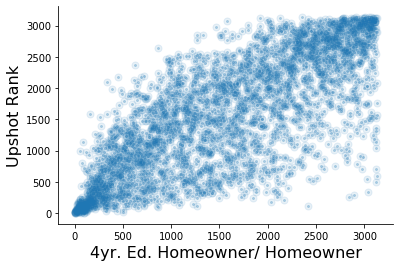

In [97]:
plt.scatter(concated['2017'].astype(float).rank(ascending=False), concated['rank'].astype(float), alpha=.1, s=50)
plt.scatter(concated['2017'].astype(float).rank(ascending=False), concated['rank'].astype(float), alpha=.25, marker='.', color='C0',s=15)
plt.ylabel('Upshot Rank', fontsize=16)
plt.xlabel('4yr. Ed. Homeowner/ Homeowner', fontsize=16)
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Upshot_rank_4yr_ed.pdf')
plt.savefig('Upshot_rank_4yr_ed.png', dpi=300)

### plot with plotly

In [37]:
pd.DataFrame(all_years['2009']/all_years_pop['2009'])

2009
02013  0.087324
02016  0.056838
02020  0.252534
02050  0.077549
02060  0.091241
...         ...
56037  0.133527
56039  0.319369
56041  0.153358
56043  0.197439
56045  0.157011

[3218 rows x 1 columns]

In [228]:
edu_09 = pd.DataFrame(all_years['2009']/all_years_pop['2009'])

In [230]:
edu_09.index.values

array(['01001', '01003', '01005', ..., '72149', '72151', '72153'],
      dtype=object)

In [153]:
target_date = '2017'
target_df = pd.DataFrame(all_years[target_date]/all_years_pop[target_date])

In [154]:
plotly_us_census(target_df, target_date, target_date, locations=target_df.index.values,save_loc = Path('./'))

Running census map from API...


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [208]:
all_years.loc['36041']

2009    2406.0
2010    2381.0
2011    2303.0
2012    2134.0
2013    1854.0
2014    1639.0
2015    1376.0
2016    1239.0
2017    1095.0
Name: 36041, dtype: float64

In [209]:
all_years_pop.loc['36041']

2009    5011.0
2010    4908.0
2011    4870.0
2012    4835.0
2013    4813.0
2014    4783.0
2015    4760.0
2016    4697.0
2017    4646.0
Name: 36041, dtype: float64

/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


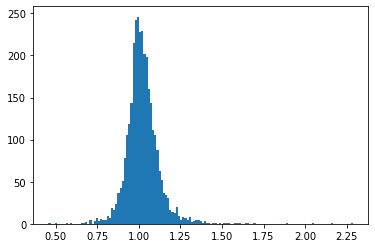

In [78]:
plt.hist(all_years['2017'] / all_years['2009'], bins='auto');
#plt.xlim(-1000,1000)

In [77]:
(all_years['2017'] / all_years['2009'])

2.287323943661972

In [47]:
year2df[2016]['state'].astype(str) + year2df[2016]['county'].astype(str) 

0       05015
1       05017
2       05019
3       05021
4       05023
        ...  
3215    72091
3216    72075
3217    72119
3218    72021
3219    72029
Length: 3220, dtype: object

In [15]:
c.acs5.state(('NAME', 'B25034_010E'), states.MD.fips, year=2015)

[{'NAME': 'Maryland', 'B25034_010E': 137303.0, 'state': '24'}]

In [17]:
c.sf1.get('NAME', geo={'for': 'tract:*',
                       'in': 'state:{} county:170'.format(states.AK.fips)})

[{'NAME': 'Census Tract 1.01, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000101'},
 {'NAME': 'Census Tract 1.02, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000102'},
 {'NAME': 'Census Tract 2, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000200'},
 {'NAME': 'Census Tract 3, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000300'},
 {'NAME': 'Census Tract 4.01, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000401'},
 {'NAME': 'Census Tract 4.02, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000402'},
 {'NAME': 'Census Tract 5.01, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000501'},
 {'NAME': 'Census Tract 5.02, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000502'},
 {'NAME': 'Cen